In [103]:
%config Completer.use_jedi = False

In [150]:
import os
import pickle
import src.utils as utils
import numpy as np
import matplotlib.pyplot as plt

In [148]:
exp_name = "Spread:mi-ms,Size:10000-50000,pi:0.03,pc:0.03,init_inf:1, init_cure:1, nsims:4"
binomial = {"ti":[],"ri":[],"tc":[],"rc":[]}
small_worlds = {"ti":[],"ri":[],"tc":[],"rc":[]}
scale_free = {"ti":[],"ri":[],"tc":[],"rc":[]}
results = {"binomial":binomial,"scale-free":scale_free, "small-worlds":small_worlds}
for file in os.listdir("results"):
    if "%" in file and file.split("%")[0].split(" - ")[1] == exp_name:
        key = file.split(" - ")[0]
        results[key]["ti"].append(utils.load_obj("results/"+file, "total_infection"))
        results[key]["ri"].append(utils.load_obj("results/"+file, "roundly_infection"))
        results[key]["tc"].append(utils.load_obj("results/"+file, "total_cured"))
        results[key]["rc"].append(utils.load_obj("results/"+file, "roundly_cured"))


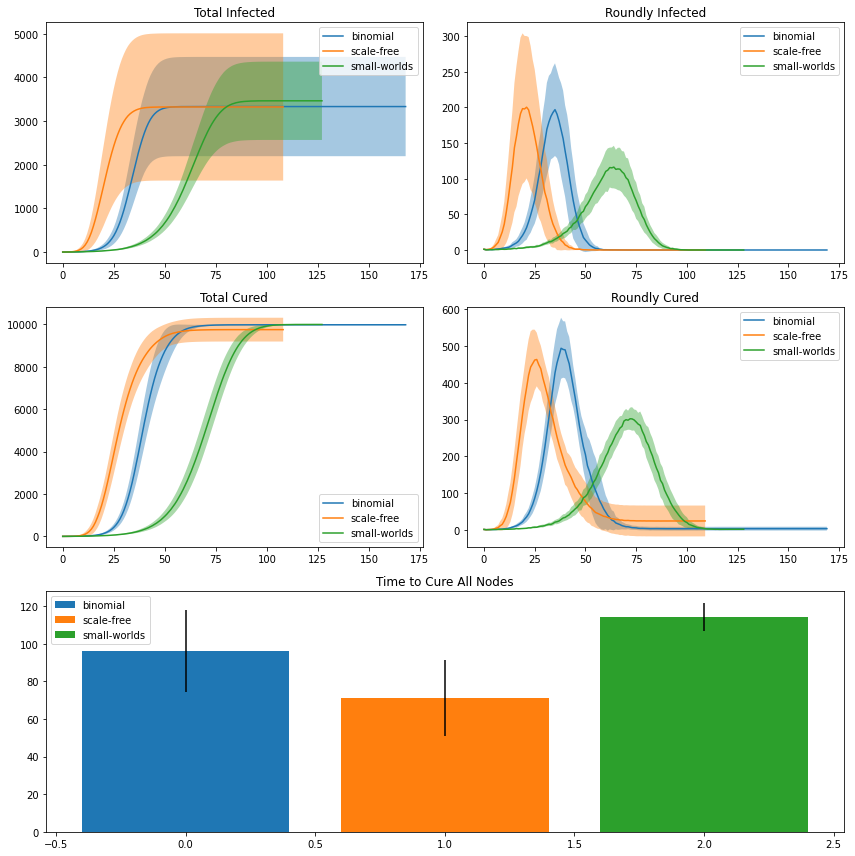

In [149]:

data_keys = ["ti","ri","tc","rc"]
tplg_keys = results.keys()
labels = ["Total Infected", "Roundly Infected", "Total Cured", "Roundly Cured"]
plt.figure(figsize=(12,12))
for k in range(4):
    ax = plt.subplot(3, 2, k+1)
    for key in tplg_keys:
        res = [np.mean(utils.padded_stack(grun), axis=0) for grun in results[key][data_keys[k]]]
        mean = np.mean(utils.padded_stack(res), axis=0)
        std =  np.std(utils.padded_stack(res), axis=0)
        ax.plot(mean, label=key)      
        ax.fill_between(range(mean.shape[0]), mean-std, mean+std, alpha=0.4)  
        ax.set_title(labels[k])
    ax.legend()        

        
ax = plt.subplot(3, 1, 3)

for keyn, key in enumerate(tplg_keys):
    res = np.array([[len(run) for run in grun] for grun in results[key][data_keys[k]]]).flatten()
    mean = np.mean(res)
    std =  np.std(res)
    ax.bar(keyn, mean, yerr=std, label=key)      
ax.set_title("Time to Cure All Nodes")
ax.legend()        
    
plt.tight_layout()
plt.savefig("img/pg2-5000_20000_ms_p003.pdf", format="pdf")      

    

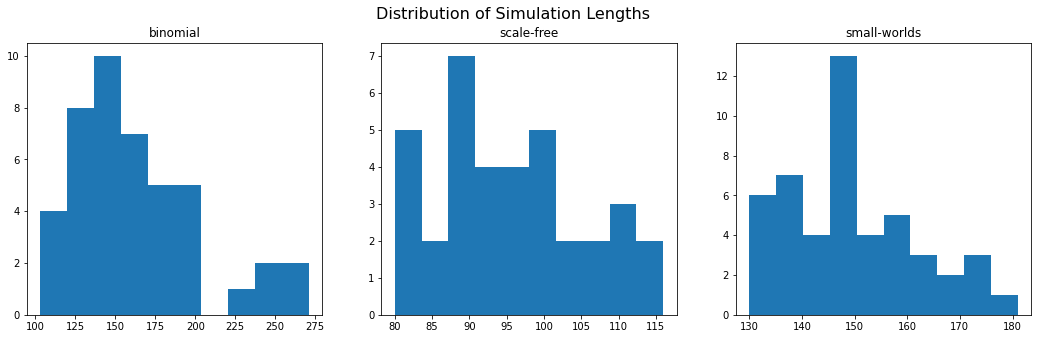

In [212]:
plt.figure(figsize=(18,5))
for keyn, key in enumerate(tplg_keys):
    ax = plt.subplot(1, 3, keyn+1)
    res = np.array([[len(run) for run in grun] for grun in results[key][data_keys[k]]]).flatten()
#     mean = np.mean(res)
#     std =  np.std(res)
    ax.hist(res)      
    ax.set_title(key)
plt.suptitle("Distribution of Simulation Lengths", size=16)
# plt.savefig("img/distributions.pdf", format='pdf')

In [102]:
arr = [1,2,3,4,8,9,123,51]
size= 10

def sample_wo_replace(arr,size):
    true_size = min(size, true_size)
    return np.random.choice(arr, 10, replace=False)

    
    

In [109]:
exp_name = "Spread:mi-ms,Size:5000-20000,pi:0.03,pc:0.03,init_inf:1, init_cure:1, nsims:4"
binomial = {"ti":[],"ri":[],"tc":[],"rc":[]}
small_worlds = {"ti":[],"ri":[],"tc":[],"rc":[]}
scale_free = {"ti":[],"ri":[],"tc":[],"rc":[]}
results = {"binomial":binomial,"scale-free":scale_free, "small-worlds":small_worlds}
for file in os.listdir("results"):
    if "%" in file and file.split("%")[0].split(" - ")[1] == exp_name:
        key = file.split(" - ")[0]
        results[key]["ti"].append(utils.load_obj("results/"+file, "total_infection"))
        results[key]["ri"].append(utils.load_obj("results/"+file, "roundly_infection"))
        results[key]["tc"].append(utils.load_obj("results/"+file, "total_cured"))
        results[key]["rc"].append(utils.load_obj("results/"+file, "roundly_cured"))


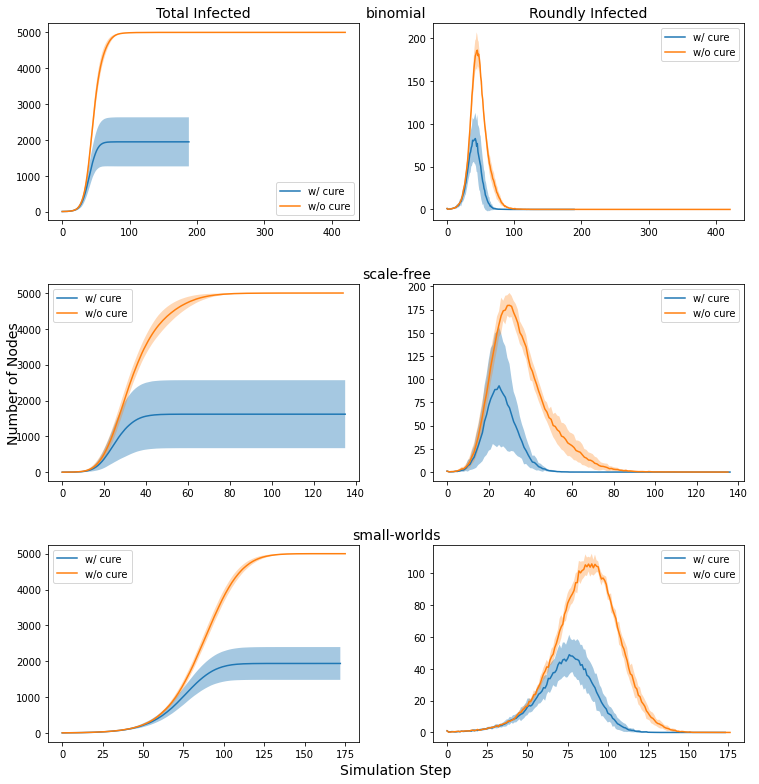

In [141]:

data_keys = ["ti","ri","tc","rc"]
tplg_keys = results.keys()
labels = ["Total Infected", "Roundly Infected", "Total Cured", "Roundly Cured"]
# plt.figure(figsize=(12,12))
fig, axs = plt.subplots(3,2,figsize=(12,12))
for t,key in enumerate(tplg_keys):
    for k in range(2):    
        res = [np.mean(utils.padded_stack(grun), axis=0) for grun in results[key][data_keys[k]]]
        mean = np.mean(utils.padded_stack(res), axis=0)
        std =  np.std(utils.padded_stack(res), axis=0)
        axs[t][k].plot(mean, label="w/ cure")      
        axs[t][k].fill_between(range(mean.shape[0]), mean-std, mean+std, alpha=0.4)  
    fig.add_subplot(int(f"31{t+1}"), frameon=False)    
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.title(key, size=14)        
    
m,n = 5000,20000
load = utils.load_obj("obj", f"results_ms_{m},{n}")
key = f'Spread:mi-ms,Size:{m}-{n},pi:0.03,init_inf:1'
    
for i in range(1,3):
    for tplg in range(3):
        res_arr = [np.mean(utils.padded_stack(graph[i]),axis=0) for graph in load[key][tplg]]
        mean = np.mean(utils.padded_stack(res_arr), axis=0)
        std =  np.std(utils.padded_stack(res_arr), axis=0)
        axs[tplg][i-1].plot(mean, label = "w/o cure")    
        axs[tplg][i-1].fill_between(range(mean.shape[0]), mean-std, mean+std, alpha=0.3)  
        axs[tplg][i-1].legend()

    
    
fig.add_subplot(121, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.title("Total Infected", size=14)

fig.add_subplot(122, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.title("Roundly Infected", size=14)

fig.add_subplot(111, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

plt.xlabel("Simulation Step", size=14)
plt.ylabel("Number of Nodes",  size=14)
plt.tight_layout()

# plt.savefig("img/pg2-one2one-5000_20000_ms_p003.pdf", format="pdf")      


# compare across probabilities

In [207]:
pis = [0.01,0.03,0.1,0.3]
pis_results = []
for pi in pis:
    exp_name = f"Spread:mi-ms,Size:5000-20000,pi:{pi},pc:0.03,init_inf:1, init_cure:1, nsims:4"
    binomial = {"ti":[],"ri":[],"tc":[],"rc":[]}
    small_worlds = {"ti":[],"ri":[],"tc":[],"rc":[]}
    scale_free = {"ti":[],"ri":[],"tc":[],"rc":[]}
    results = {"binomial":binomial,"scale-free":scale_free, "small-worlds":small_worlds}
    for file in os.listdir("results"):
        if "%" in file and file.split("%")[0].split(" - ")[1] == exp_name:
            key = file.split(" - ")[0]
            results[key]["ti"].append(utils.load_obj("results/"+file, "total_infection"))
            results[key]["ri"].append(utils.load_obj("results/"+file, "roundly_infection"))
            results[key]["tc"].append(utils.load_obj("results/"+file, "total_cured"))
            results[key]["rc"].append(utils.load_obj("results/"+file, "roundly_cured"))
    pis_results.append(results)

0.01
0.03
0.1
0.3


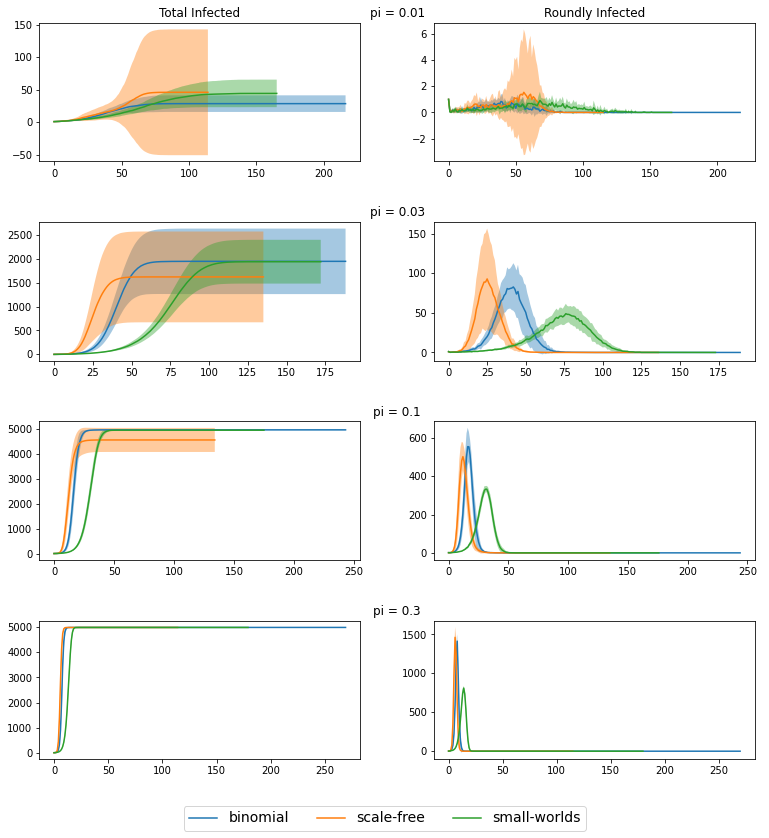

In [208]:
data_keys = ["ti","ri","tc","rc"]
tplg_keys = results.keys()
labels = ["Total Infected", "Roundly Infected", "Total Cured", "Roundly Cured"]
# plt.figure(figsize=(12,12))
fig, axs  = plt.subplots(4,2, figsize=(12,12))
for k in range(4):
    print(pis[k])
    for i in range(2):
        ax = axs[k][i]
        for key in tplg_keys:
            res = [np.mean(utils.padded_stack(grun), axis=0) for grun in pis_results[k][key][data_keys[i]]]
            mean = np.mean(utils.padded_stack(res), axis=0)
            std =  np.std(utils.padded_stack(res), axis=0)
            ax.plot(mean, label=key)      
            ax.fill_between(range(mean.shape[0]), mean-std, mean+std, alpha=0.4)  
#             ax.set_title(labels[i])
    fig.add_subplot(int(f"41{k+1}"), frameon=False)    
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.title("pi = " + str(pis[k]))            

fig.legend(tplg_keys, loc='lower center', ncol=4, fontsize =14) 

fig.add_subplot(121, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.title("Total Infected")

fig.add_subplot(122, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.title("Roundly Infected")


fig.add_subplot(111, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

    
plt.tight_layout()
# plt.savefig("img/pg2-pis-compare_ms_5k.pdf", format="pdf")

#     

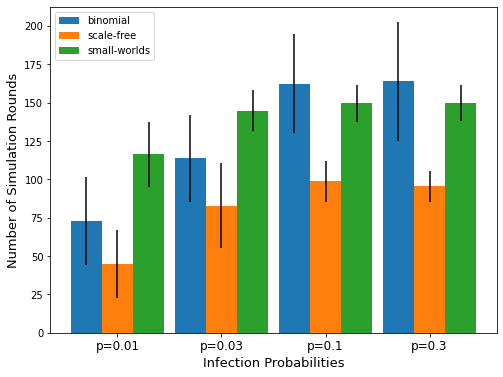

In [211]:
# load = utils.load_obj("obj", "results_ms_10000,50000")

data_keys = ["ti","ri","tc","rc"]
tplg_keys = results.keys()
# labels = ["Total Infected", "Roundly Infected", "Total Cured", "Roundly Cured"]

labels = ["binomial", "scale-free", "small-worlds - p=0.07"]#, "small-worlds - p=0.35"]
fig, axs = plt.subplots(1,1, figsize=(8,6))

for tplg, key in enumerate(tplg_keys):
    k=-1
    this_tplg_means = []
    this_tplg_stds = []
    for result in pis_results:
        k += 1
        res_arr = np.array([[len(run) for run in grun] for grun in result[key][data_keys[1]]]).flatten()
        this_tplg_means.append(np.mean(res_arr))
        this_tplg_stds.append(np.std(res_arr))
    ind = np.arange(k+1)
    axs.bar(ind + 0.3*tplg, this_tplg_means, yerr=this_tplg_stds, label=key, width=0.3)      
#     fig.add_subplot(int(f"41{k+1}"), frameon=False)    
#     plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#     plt.title(key.split(",")[2])

axs.legend(loc="upper left")
axs.set_xticks(ind + 0.3)
axs.set_xticklabels(["p=0.01","p=0.03","p=0.1","p=0.3"], size=12)
axs.set_xlabel("Infection Probabilities",size=13)
axs.set_ylabel("Number of Simulation Rounds",size=13)
# plt.savefig("img/pg2-pis-compare_ms_5k_bar.pdf", format="pdf")

# Compare Sizes

In [181]:
sizes = [(500,1000),(1000,3000),(5000,20000),(10000,50000),(20000,100000)]
sizes_results = []
for size in sizes:
    m,n = size
    exp_name = f"Spread:mi-ms,Size:{m}-{n},pi:0.03,pc:0.03,init_inf:1, init_cure:1, nsims:4"
    binomial = {"ti":[],"ri":[],"tc":[],"rc":[]}
    small_worlds = {"ti":[],"ri":[],"tc":[],"rc":[]}
    scale_free = {"ti":[],"ri":[],"tc":[],"rc":[]}
    results = {"binomial":binomial,"scale-free":scale_free, "small-worlds":small_worlds}
    for file in os.listdir("results"):
        if "%" in file and file.split("%")[0].split(" - ")[1] == exp_name:
            try:
                key = file.split(" - ")[0]
                results[key]["ti"].append(utils.load_obj("results/"+file, "total_infection"))
                results[key]["ri"].append(utils.load_obj("results/"+file, "roundly_infection"))
                results[key]["tc"].append(utils.load_obj("results/"+file, "total_cured"))
                results[key]["rc"].append(utils.load_obj("results/"+file, "roundly_cured"))
            except Exception as e:
                print(e)
    sizes_results.append(results)

[Errno 2] No such file or directory: 'results/binomial - Spread:mi-ms,Size:500-1000,pi:0.03,pc:0.03,init_inf:1, init_cure:1, nsims:4%-gourd%-run190/total_infection.pkl'
[Errno 2] No such file or directory: 'results/binomial - Spread:mi-ms,Size:500-1000,pi:0.03,pc:0.03,init_inf:1, init_cure:1, nsims:4%-kelp%-run206/total_infection.pkl'
[Errno 2] No such file or directory: 'results/binomial - Spread:mi-ms,Size:500-1000,pi:0.03,pc:0.03,init_inf:1, init_cure:1, nsims:4%-swordfish%-run326/total_infection.pkl'


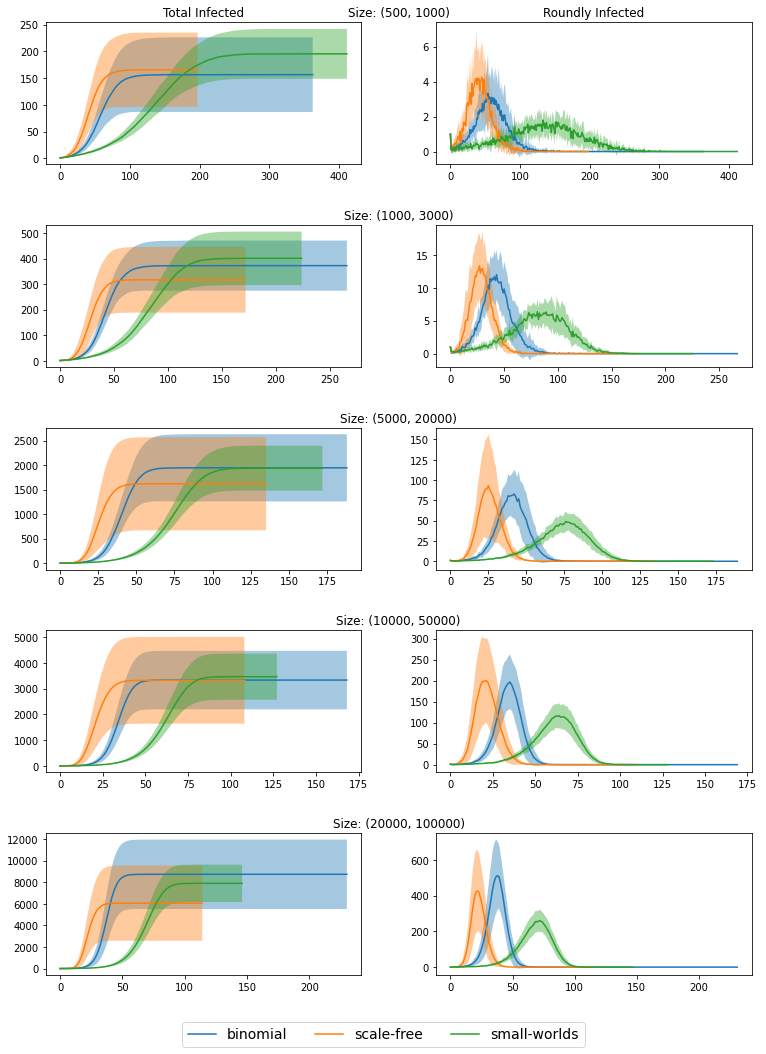

In [191]:
data_keys = ["ti","ri","tc","rc"]
tplg_keys = results.keys()
labels = ["Total Infected", "Roundly Infected", "Total Cured", "Roundly Cured"]
# plt.figure(figsize=(12,12))
fig, axs  = plt.subplots(len(sizes),2, figsize=(12,15))
for k in range(len(sizes)):
#     print(sizes[k])
    for i in range(2):
        ax = axs[k][i]
        for key in tplg_keys:
            res = [np.mean(utils.padded_stack(grun), axis=0) for grun in sizes_results[k][key][data_keys[i]]]
            mean = np.mean(utils.padded_stack(res), axis=0)
            std =  np.std(utils.padded_stack(res), axis=0)
            ax.plot(mean, label=key)      
            ax.fill_between(range(mean.shape[0]), mean-std, mean+std, alpha=0.4)  
#             ax.set_title(labels[i])
    fig.add_subplot(int(f"51{k+1}"), frameon=False)    
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.title("Size: " + str(sizes[k]))
        
fig.legend(tplg_keys, loc='lower center', ncol=4, fontsize =14) 

fig.add_subplot(121, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.title("Total Infected")

fig.add_subplot(122, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.title("Roundly Infected")


fig.add_subplot(111, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

plt.tight_layout()

# plt.savefig("img/pg2-sizes-compare_ms_003.pdf", format="pdf")


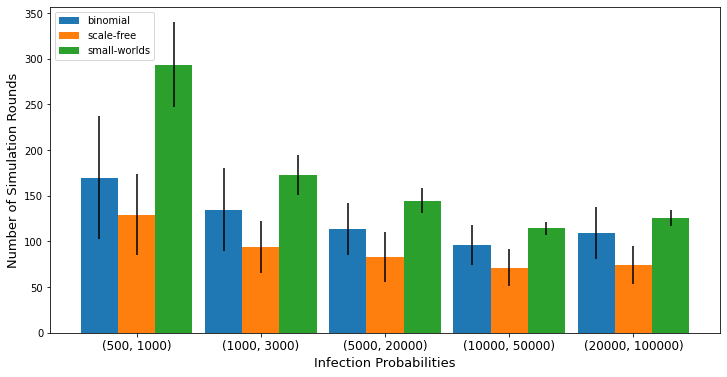

In [206]:

data_keys = ["ti","ri","tc","rc"]
tplg_keys = results.keys()
# labels = ["Total Infected", "Roundly Infected", "Total Cured", "Roundly Cured"]

labels = ["binomial", "scale-free", "small-worlds - p=0.07"]#, "small-worlds - p=0.35"]
fig, axs = plt.subplots(1,1, figsize=(12,6))

for tplg, key in enumerate(tplg_keys):
    k=-1
    this_tplg_means = []
    this_tplg_stds = []
    for result in sizes_results:
        k += 1
        res_arr = np.array([[len(run) for run in grun] for grun in result[key][data_keys[1]]]).flatten()
        this_tplg_means.append(np.mean(res_arr))
        this_tplg_stds.append(np.std(res_arr))
    ind = np.arange(k+1)
    axs.bar(ind + 0.3*tplg, this_tplg_means, yerr=this_tplg_stds, label=key, width=0.3)      
#     fig.add_subplot(int(f"41{k+1}"), frameon=False)    
#     plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#     plt.title(key.split(",")[2])

axs.legend(loc="upper left")
axs.set_xticks(ind + 0.3)
axs.set_xticklabels([str(size) for size in sizes], size=12)
axs.set_xlabel("Infection Probabilities",size=13)
axs.set_ylabel("Number of Simulation Rounds",size=13)
plt.savefig("img/pg2-sizes-compare_ms_003_bar.pdf", format="pdf")